## Importing Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

## Loading the Data

In [3]:
data = pd.read_csv('Student Mental health.csv')
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [5]:
#drop NA value
data= data[data['Age'].notna()]
data.shape

(100, 11)

In [6]:
data.head(1)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No


In [7]:
#Rename columns
data.columns = ['Timestamp', 'Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment']
data.head(1)

,Timestamp,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No


In [8]:
#Formatting the Year column
data['Year'].unique()
# array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2', 'Year 3'], dtype=object)

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

##### Few findings
- The maximum duration of any particular course is 4 years as per the data. The minimum duration cannot be determined.
- Year 1  and year 1 mean the same thing (and same with other values) yet are interpreted as different.
- No need of the word 'Year' or 'year', we can work with just the number.

In [9]:
def Clean(Text):
    Text = Text[-1]
    Text = int(Text)
    return Text
data["Year"] = data["Year"].apply(Clean)
print("First three values of Year after cleaning text:")
print(data["Year"][:3], "\n")

First three values of Year after cleaning text:
0    1
1    2
2    1
Name: Year, dtype: int64 



In [10]:
data['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

##### Few findings
- The CGPA column has ranges rather than an absolute value.
- The range '3.50 - 4.00' is same as '3.50 - 4.00 ', so we need to trim the trailing whitespace.
- The ranges can be converted to their mean values, but I will keep them as it is for further exploration.

In [11]:
def remove_space(string):
    string = string.strip()
    return string
data["CGPA"] = data["CGPA"].apply(remove_space)
print("First three values of CGPA after cleaning text:")
print(data["CGPA"][:3], "\n")
print(data['CGPA'].unique())

First three values of CGPA after cleaning text:
0    3.00 - 3.49
1    3.00 - 3.49
2    3.00 - 3.49
Name: CGPA, dtype: object 

['3.00 - 3.49' '3.50 - 4.00' '2.50 - 2.99' '2.00 - 2.49' '0 - 1.99']


In [12]:
len(data['Course'].unique())

49

We can observe that a lot of courses are interpreted differently though they mean the same, so we need to take care of that.

In [13]:
#Let's replace redundant course name with the standard course name
data['Course'].replace({'engin': 'Engineering' , 'Engine':'Engineering' , 'Islamic education':'Islamic Education' , 'Pendidikan islam':'Pendidikan Islam' , 'BIT':'IT', 'psychology':'Psychology', 'koe': 'Koe', 'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'Benl': 'BENL', 'Fiqh fatwa ': 'Fiqh', 'Laws': 'Law'} , inplace = True)
len(data['Course'].unique())

37

## Model Selection

In [32]:
X = data.drop(["CGPA"],axis=1)
y = data["CGPA"]

In [33]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [34]:
#A quick model selection process
#pipelines of models( it is short was to fit and pred)
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.557143 
Decision Tree: 0.471429 
RandomForest: 0.628571 
SVC: 0.500000 


## Model Evaluation

In [35]:
#taking look at the test set
pred_rfc = pipeline_rf.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.43333333333333335


In [36]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
#Testing the Model on test set
predictions=RF_model.predict(X_test)
acccuracy= accuracy_score(y_test,predictions)
acccuracy

0.4666666666666667

In [37]:
acccuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1_score = f1_score(y_test, predictions, average="micro")

print("********* Random Forest Results *********")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)

********* Random Forest Results *********
Accuracy    :  0.4666666666666667
Recall      :  0.4666666666666667
Precision   :  0.40159489633173845
F1 Score    :  0.4666666666666667


In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.47      0.75      0.58        12
           4       0.45      0.36      0.40        14

    accuracy                           0.47        30
   macro avg       0.19      0.22      0.20        30
weighted avg       0.40      0.47      0.42        30



We can observe that a lot of courses are interpreted differently though they mean the same, so we need to take care of that.

In [13]:
#Let's replace redundant course name with the standard course name
data['Course'].replace({'engin': 'Engineering' , 'Engine':'Engineering' , 'Islamic education':'Islamic Education' , 'Pendidikan islam':'Pendidikan Islam' , 'BIT':'IT', 'psychology':'Psychology', 'koe': 'Koe', 'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'Benl': 'BENL', 'Fiqh fatwa ': 'Fiqh', 'Laws': 'Law'} , inplace = True)
len(data['Course'].unique())

37

The data is quite clean and the new feature has been included. Let's proceed to the next step. That is, exploring the data.

## Data Exploration

In this section,

Exploring data for outliers

- Exploring the Course attribute
- Exploring the Evaluation attributes(Depression, Anxiety, Panic_Attack)
<br>

Let us start with pairplot

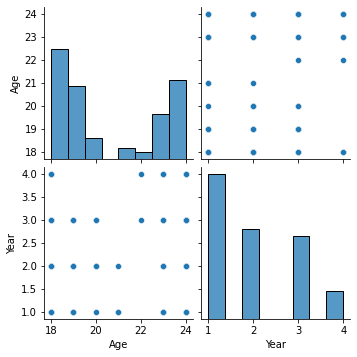

In [14]:
sns.pairplot(data)

No outliers, Awesome!

##### Let's have an year-wise analysis of students from different courses:

[Text(0, 0, 'Engineering'),
 Text(1, 0, 'IT'),
 Text(2, 0, 'BCS'),
 Text(3, 0, 'Irkhs'),
 Text(4, 0, 'Psychology'),
 Text(5, 0, 'Banking Studies'),
 Text(6, 0, 'ALA'),
 Text(7, 0, 'BENL'),
 Text(8, 0, 'CTS'),
 Text(9, 0, 'Econs'),
 Text(10, 0, 'Malcom'),
 Text(11, 0, 'Biomedical science'),
 Text(12, 0, 'KOE'),
 Text(13, 0, 'Radiography'),
 Text(14, 0, 'Islamic Education')]

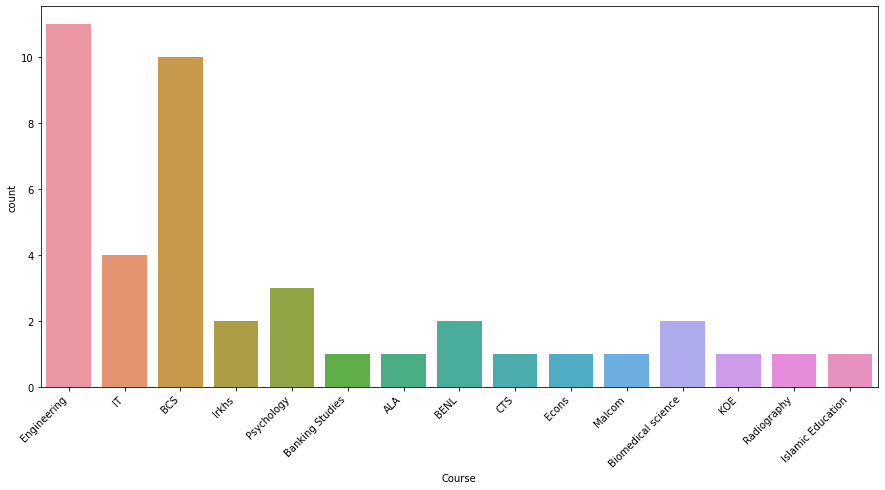

In [15]:
plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = data[data['Year'] == 1])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Islamic Education'),
 Text(1, 0, 'Engineering'),
 Text(2, 0, 'Pendidikan Islam'),
 Text(3, 0, 'Human Resources'),
 Text(4, 0, 'KENMS'),
 Text(5, 0, 'IT'),
 Text(6, 0, 'Marine science'),
 Text(7, 0, 'KOE'),
 Text(8, 0, 'Business Administration'),
 Text(9, 0, 'BCS'),
 Text(10, 0, 'Usuluddin '),
 Text(11, 0, 'TAASL'),
 Text(12, 0, 'Human Sciences '),
 Text(13, 0, 'Communication '),
 Text(14, 0, 'Diploma Nursing'),
 Text(15, 0, 'Pendidikan Islam '),
 Text(16, 0, 'Koe'),
 Text(17, 0, 'Biomedical science')]

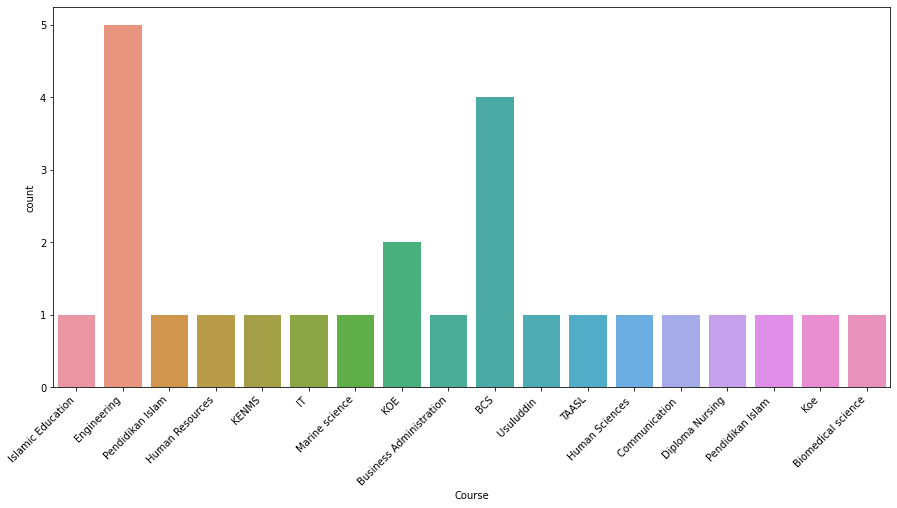

In [16]:
plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = data[data['Year'] == 2])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Law'),
 Text(1, 0, 'Engineering'),
 Text(2, 0, 'BCS'),
 Text(3, 0, 'Accounting '),
 Text(4, 0, 'IT'),
 Text(5, 0, 'Biomedical science'),
 Text(6, 0, 'Koe'),
 Text(7, 0, 'Irkhs'),
 Text(8, 0, 'BENL'),
 Text(9, 0, 'KOE'),
 Text(10, 0, 'MHSC'),
 Text(11, 0, 'Biotechnology'),
 Text(12, 0, 'Fiqh'),
 Text(13, 0, 'DIPLOMA TESL'),
 Text(14, 0, 'Nursing ')]

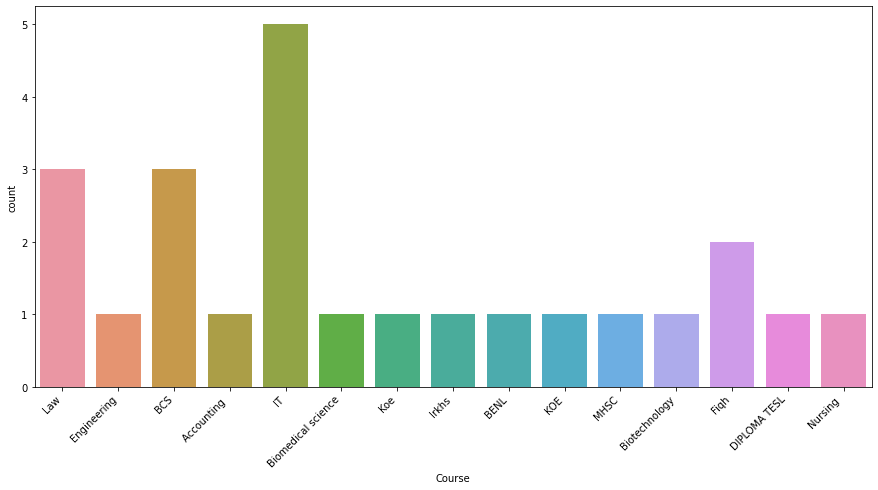

In [17]:
plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = data[data['Year'] == 3])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Mathemathics'),
 Text(1, 0, 'ENM'),
 Text(2, 0, 'BCS'),
 Text(3, 0, 'Engineering'),
 Text(4, 0, 'Kop'),
 Text(5, 0, 'Pendidikan Islam')]

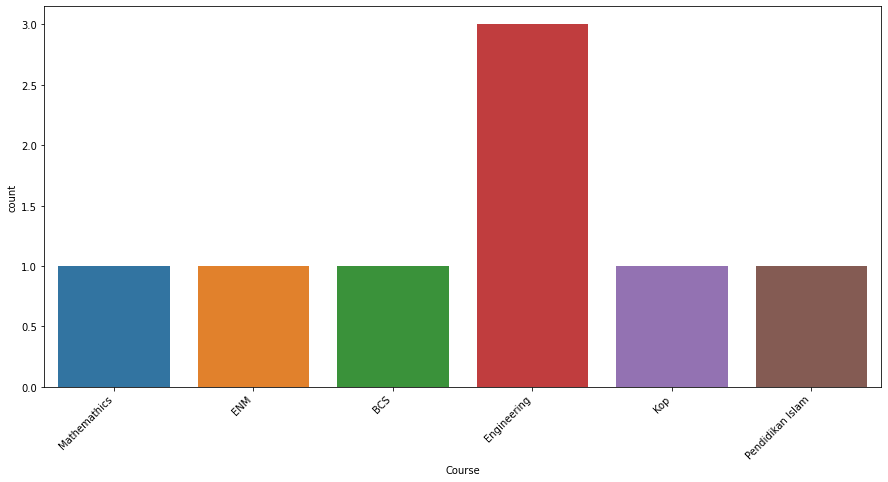

In [18]:
plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = data[data['Year'] == 4])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

### Year-wise analysis of students from different courses
##### Here are some of the stats:
- Maximum students from Year 4 are from Engineering.
- Missing Courses from the Year 4 (x-axis) must have a course duration of 3 years.
- Engineering, BCS and IT students rule the survey with maximum number of responses.

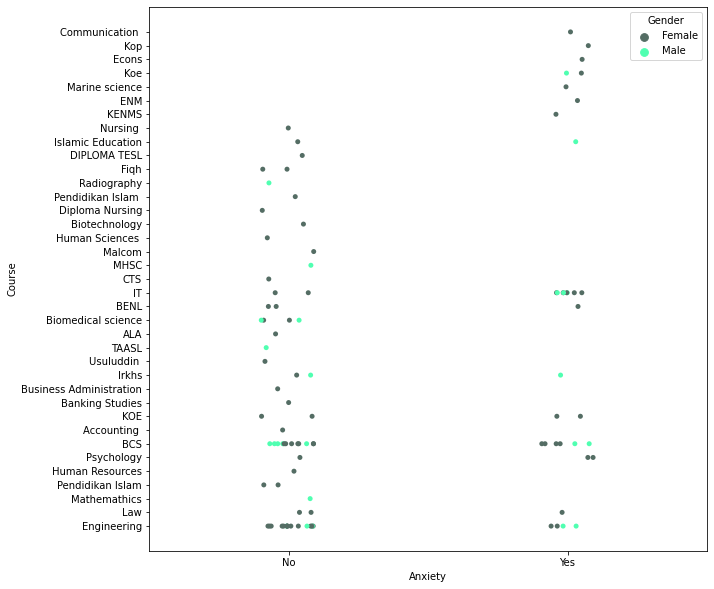

In [19]:
plt.figure(figsize=(10, 10))
sns.stripplot(x = 'Anxiety', y = 'Course', hue = 'Gender', data = data, palette = ['#546D64', '#50FFB1'])
plt.show()

### Anxiety vs Course
##### Here are some of the stats: 
- Students enrolled in IT experience the maximum anxiety.
- Students enrolled in fields related to Islam(Islamic Education, Pendidikan Islam, Fiqh, Usuluddin, etc.) and Biology(Human Sciences, Nursing, Biomedical Sciences) are less prone to anxiety.
- Computer Science(BCS) has almost an equal number of students who experience anxiety and those who not.  

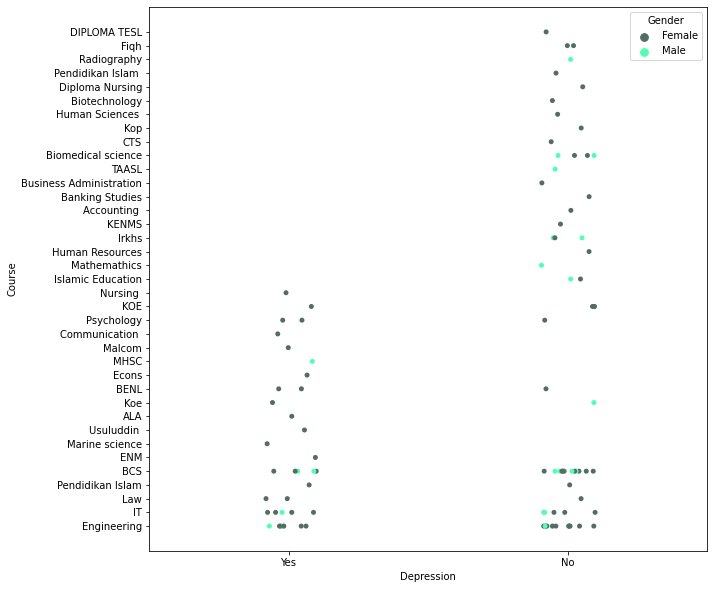

In [20]:
plt.figure(figsize=(10, 10))
sns.stripplot(x = 'Depression', y = 'Course', hue = 'Gender', data = data, palette = ['#546D64', '#50FFB1'])
plt.show()

### Depression vs Course
##### Here are some of the stats: 
- Males are less prone to experiencing depression as compared to females.
- 2/3 females in Psychology experience depression,... Strange!
- Around 50% of the Students in IT experience depression.

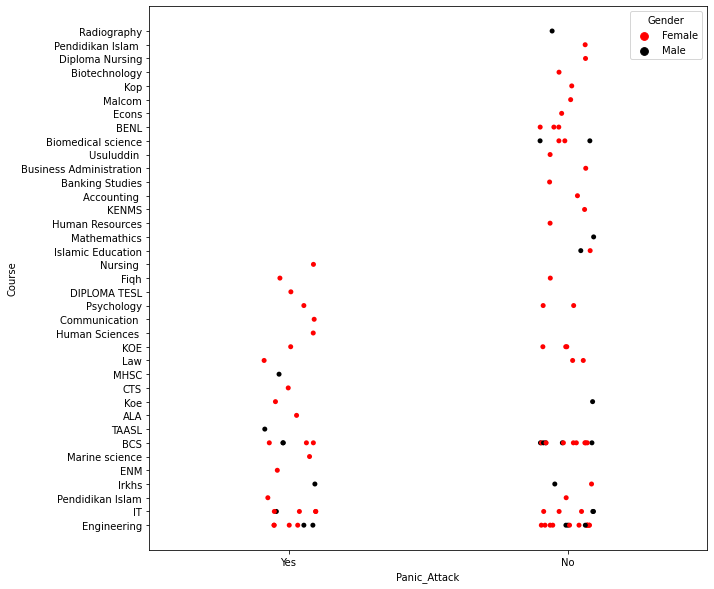

In [21]:
plt.figure(figsize=(10, 10))
sns.stripplot(x = 'Panic_Attack', y = 'Course', hue = 'Gender', data = data, palette = ['red', 'black'])
plt.show()

### Panic Attack vs Course
##### Here are some of the stats: 
- Males are less prone to experiencing panic attacks as compared to females.
- Approximately 37.5% of Engineering students experience panic attacks.
- About 62.5% of IT students experience panic attacks.
- About 18% of BCS students experience panic attacks.


##### Let's have a look at the age distribution of people

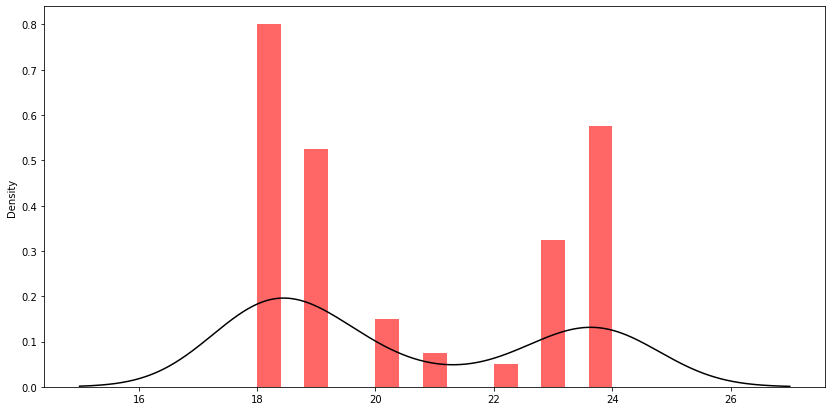

In [22]:
plt.figure(figsize=(14,7))
ax = data["Age"].hist(bins=15, density=True, stacked=True, color='red', alpha=0.6)
data["Age"].plot(kind='density', color='black')
plt.show()

#### Few Findings
- We have students from ages between 18 - 24.
- We do not have much responses from students aged 20-23.

**Let's analyse various parameters(Depression, Anxiety, Panic_Attack) yearwise.**

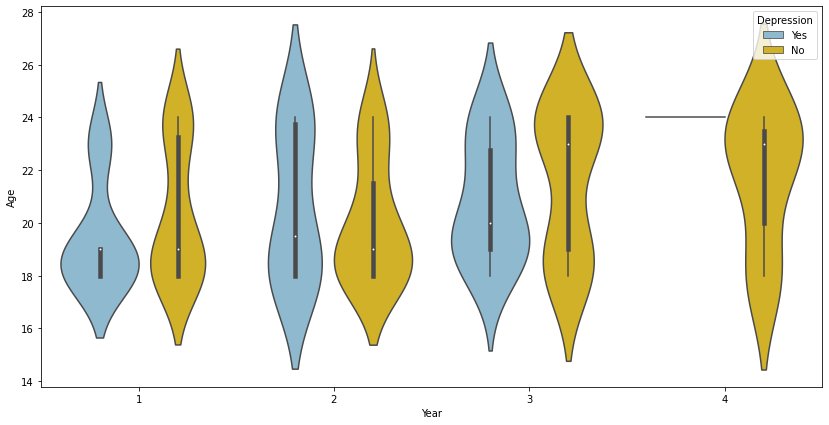

In [23]:
plt.figure(figsize=(14,7))
sns.violinplot(x = 'Year', y = 'Age', data = data,  hue = 'Depression', palette = ['#84BCDA', '#ECC30B'])
plt.show()

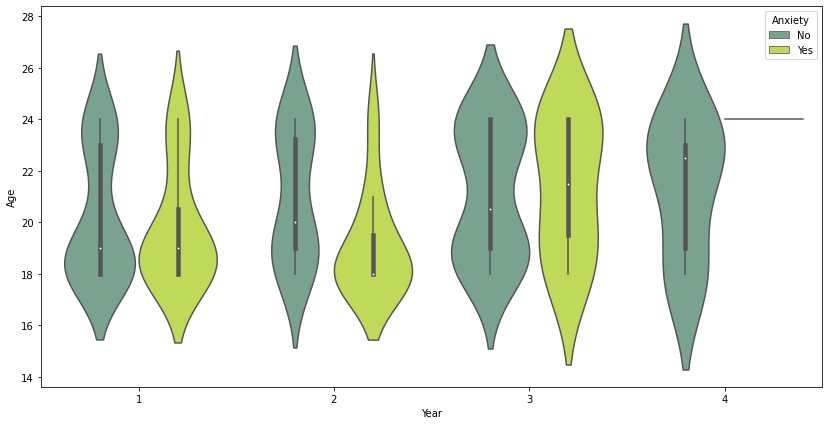

In [24]:
plt.figure(figsize=(14,7))
sns.violinplot(x = 'Year', y = 'Age', data = data,  hue = 'Anxiety', palette = ['#72A98F', '#CBEF43'])
plt.show()

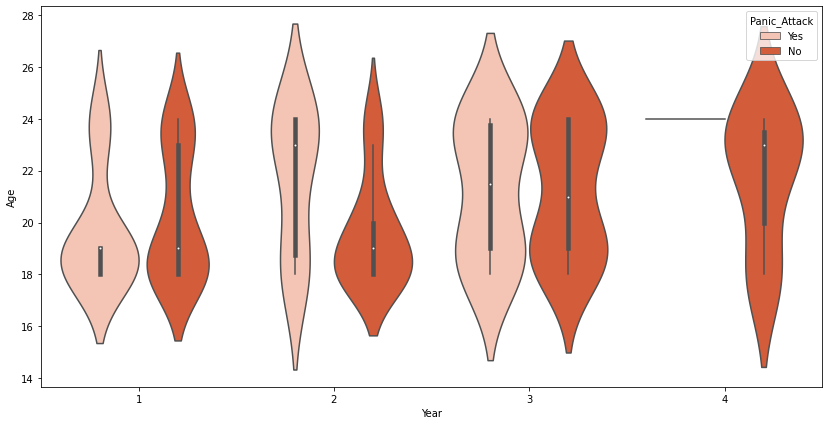

In [25]:
plt.figure(figsize=(14,7))
sns.violinplot(x = 'Year', y = 'Age', data = data,  hue = 'Panic_Attack', palette = ['#FEC0AA', '#EC4E20'])
plt.show()

### Key Findings:
- Year 4 students do not experience Depression, Anxiety or Panic Attacks except for those who are aged 24
- Year 3 has a versatile distribution of students. Mixed reviews.
- Year 1 students aged between 18 - 20 experience the most amongst depression, anxiety, panic attacks.
- Year 3 students are more anxiety prone.

**Does CGPA affect mental health?** Let's find out!

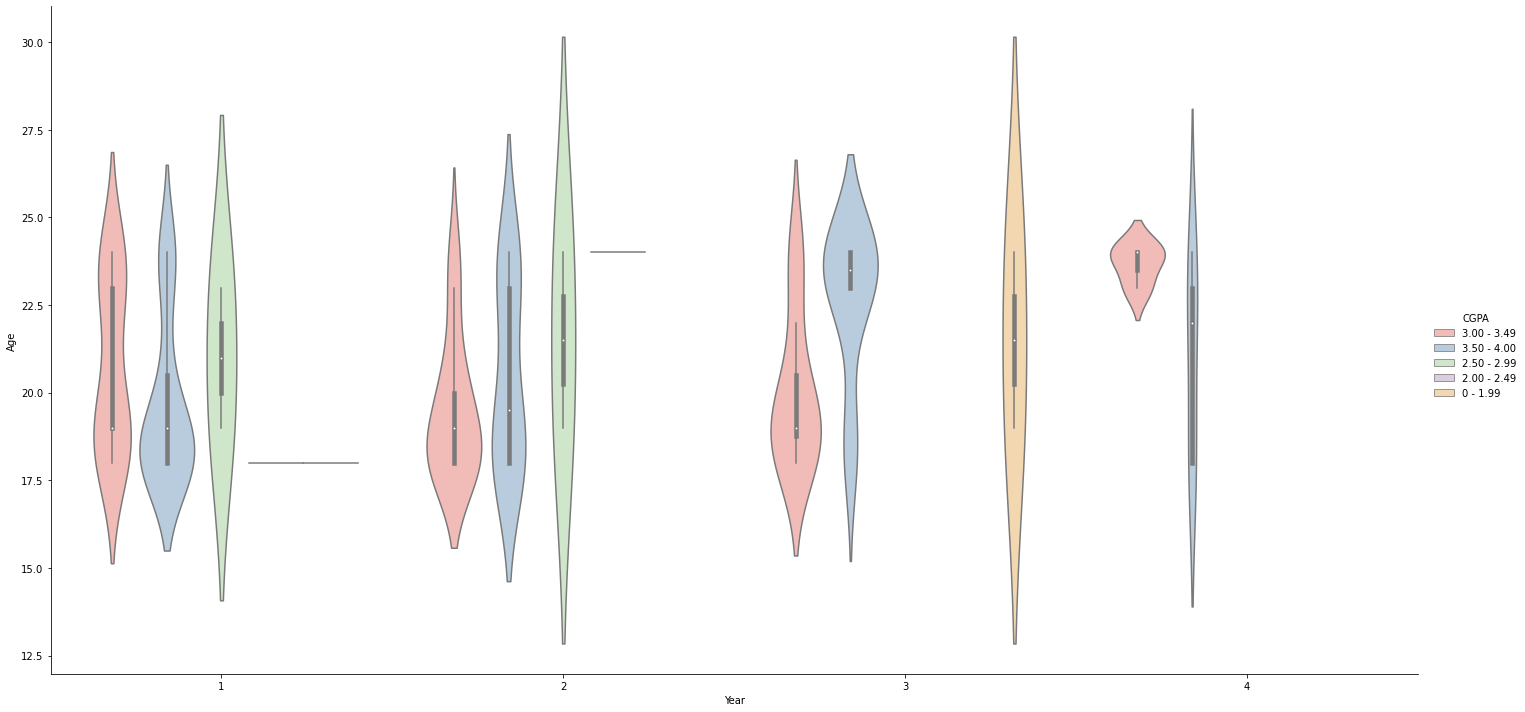

In [26]:
sns.catplot(data=data, x="Year", y="Age", hue="CGPA", kind="violin", palette="Pastel1",height=10,aspect=2)

### Few Findings:
- Year 3 and 4 students who perform academically well and therefore have slight or no mental health problems.
- Many Year 3 Students have thier GPAs under 2.0.
- Students from Year 1 and Year 2 perform academically better having their GPAs above 2.5.
- Year 1 students aged 18- 20 despite having decent GPAs experience mental breakdowns. How is that possible? Maybe self-doubt, imposter syndrome, etc. (Just an assumption) 

Up next I will plot the classic correlation matrix with a few significant columns.

<AxesSubplot:>

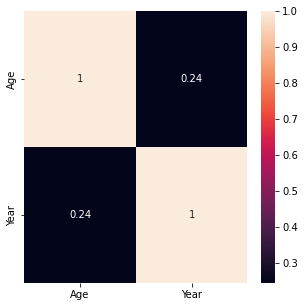

In [27]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(5,5))  
sns.heatmap(corrmat,annot=True, cmap=None)

##### No way this helps!

## Data Preprocessing

In this section,

##### The following steps are involved:

- we will perform label encoding to the columns (CGPA, Depression, Anxiety, Panick_Attack) to get unique numerical value to each attribute.
- I think we do not require Timestamp, so we'll drop it out.
- Assigning labels and targets.
- Splitting the test and training sets.

In [28]:
data.drop('Timestamp', axis=1, inplace=True)

In [29]:
data.head(20)

,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic Education,2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,IT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Law,3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No
5,Male,19.0,Engineering,2,3.50 - 4.00,No,No,No,Yes,No
6,Female,23.0,Pendidikan Islam,2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,Female,18.0,BCS,1,3.50 - 4.00,No,No,Yes,No,No
8,Female,19.0,Human Resources,2,2.50 - 2.99,No,No,No,No,No
9,Male,18.0,Irkhs,1,3.50 - 4.00,No,No,Yes,Yes,No


In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_columns= [x for x in data.columns if data.dtypes[x] == 'object']
for column in categorical_columns:
    data[column] = encoder.fit_transform(data[column])
data.head()

,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,0,18.0,14,1,3,0,1,0,1,0
1,1,21.0,20,2,3,0,0,1,0,0
2,1,19.0,18,1,3,0,1,1,1,0
3,0,22.0,25,3,3,1,1,0,0,0
4,1,23.0,29,4,3,0,0,0,0,0


<AxesSubplot:>

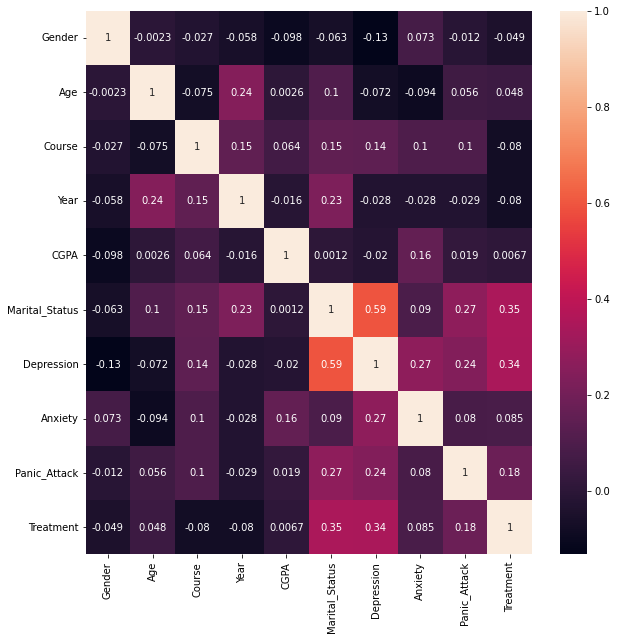

In [31]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(10,10))  
sns.heatmap(corrmat,annot=True, cmap=None)

#### Few Findings:
- Marital_Status shows a close association with Depression.
- Depression. Anxiety, Panick_Attack show a significant correlation.
- Medical assistance(Treatment) shows a slight correlation with Marital_Status 

## Model Selection

For model selection, I will be building pipelines of five different classifiers and select one with the best fit results.

In this section:
- Split data into trainig and testing sets
- Assigning targets and features
- The model pipelines with preprocessing:
- Fitting the training set to the various models.
- Getting the confusion matrix and accuracy scores.
- Picking the best classifier.

In [32]:
X = data.drop(["CGPA"],axis=1)
y = data["CGPA"]

In [33]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [34]:
#A quick model selection process
#pipelines of models( it is short was to fit and pred)
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.557143 
Decision Tree: 0.471429 
RandomForest: 0.585714 
SVC: 0.500000 


So Random Forest does best amongst the models to be the most accurate. Let us build a better random forest with grid search cv. Let's find out how it performs on testset

## Model Evaluation

##### The following steps are involved:
- Build a Random Forest model.
- Create classification report.
- Visualize the confusion matrix

In [35]:
#taking look at the test set
pred_rfc = pipeline_rf.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.4666666666666667


In [36]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
#Testing the Model on test set
predictions=RF_model.predict(X_test)
acccuracy= accuracy_score(y_test,predictions)
acccuracy

0.4666666666666667

In [37]:
acccuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1_score = f1_score(y_test, predictions, average="micro")

print("********* Random Forest Results *********")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)

********* Random Forest Results *********
Accuracy    :  0.4666666666666667
Recall      :  0.4666666666666667
Precision   :  0.39788359788359784
F1 Score    :  0.4666666666666667


In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.48      0.83      0.61        12
           4       0.44      0.29      0.35        14

    accuracy                           0.47        30
   macro avg       0.18      0.22      0.19        30
weighted avg       0.40      0.47      0.40        30



<AxesSubplot:>

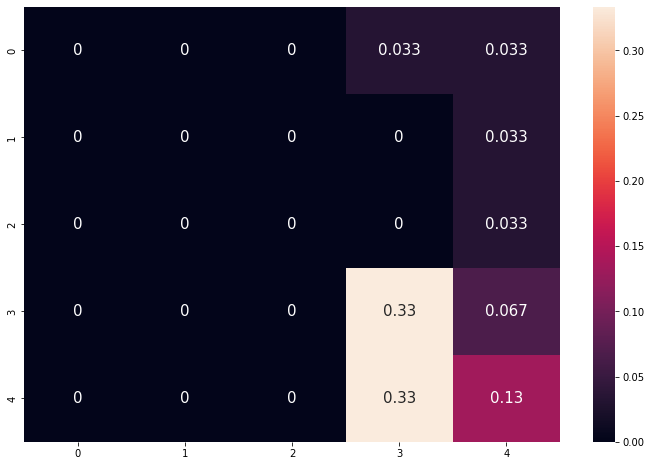

In [39]:
# confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=None,annot = True, annot_kws = {'size':15})

## Conclusion

![](https://images.unsplash.com/photo-1613618958001-ee9ad8f01f9c?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2070&q=80)

#### If you found it helpful, do upvote!
#### Feel free to comment!
#### I would love to have suggestions.
#### Cheers y'all❤️